In [1010]:
import numpy as np
import pandas as pd
import cv2
import torch
import os
from torch import nn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import gensim
import gensim.downloader as api
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from collections import OrderedDict

In [4]:
## Lading the images and the corpus
d1 = """
Painting of the Monalisa. Made by the famous Italian painter Leonardo Davinci. It represents a woman 
sitting, looking at the audience and smiling, with mountains in the background.
"""

d2 = """
A drawing of a forest in fall season, at dusk, drowning in a lake full of aquatic plants.
"""

d3 = """
A forest in fall season, at dusk. Realistic painting. Drowning in a lake full of aquatic plants with
a pathway like in front.
"""

d4 = """
Modern Painting of the actress Scarlett Johanson with a red background and smudged paint.
"""

d5 = """
A painting of a woman wearing a dress in the victorian era, sitting on a lounge chair with a lamp 
behind her and reading a book. 
In the background there is a blue wall with pictures around it and a piano
on the right of the painting.
"""

corpus = np.array([d1, d2, d3, d4, d5])

images = []
for img in os.listdir("images/"):
    images.append(cv2.imread("images/"+img))
images = np.array(images)

C:\Users\OCCURE~1\AppData\Local\Temp/ipykernel_8272/3433932570.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


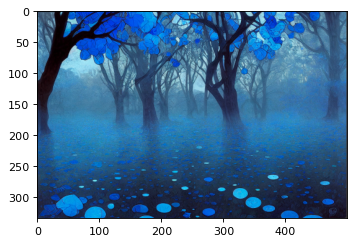

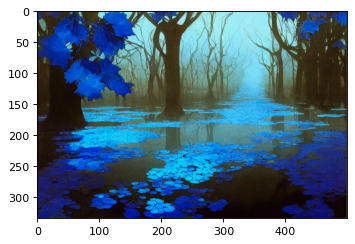

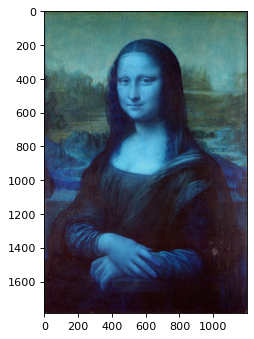

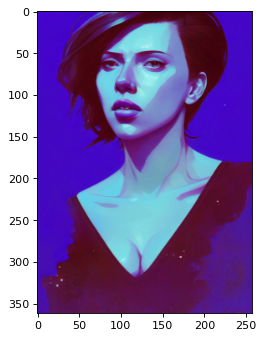

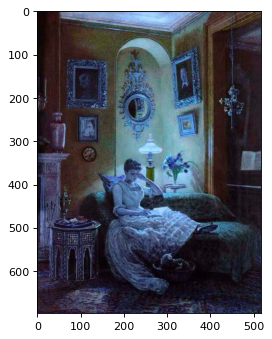

In [5]:
# Show the images that we will be working with
for i in range(images.shape[0]):
    figure(figsize=(5,5), dpi=80)
    plt.imshow(images[i])
    plt.show()

## Preparing the data

#### 1) Preparing the images:

In [6]:
for i in range(images.shape[0]):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    images[i] = cv2.resize(images[i], (480,720))

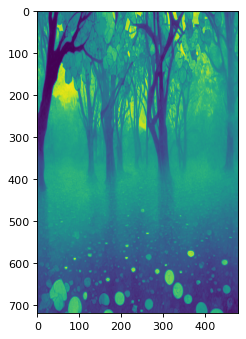

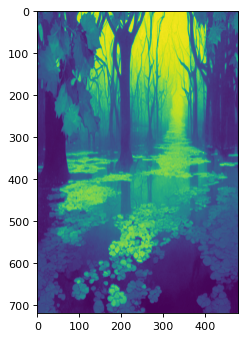

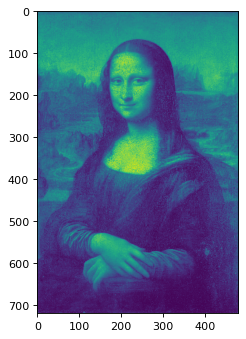

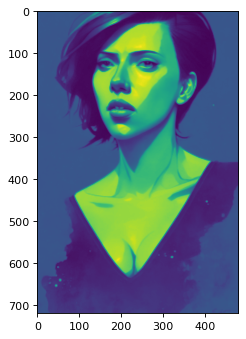

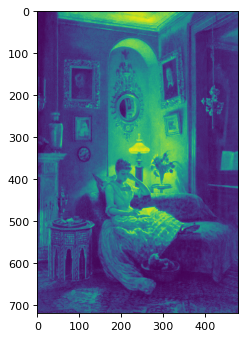

In [7]:
for i in range(images.shape[0]):
    figure(figsize=(5,5), dpi=80)
    plt.imshow(images[i])
    plt.show()

In [8]:
## Convert images from numpy array to tensors
for i in range(images.shape[0]):
    images[i] = torch.tensor(images[i])
    images[i] = images[i].type(torch.FloatTensor) ## convert the thupe to float tensor fon the CNN layer

#### 2) Prepaing the corpus:

In [9]:
cv = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
features = cv.fit_transform(corpus)

In [10]:
pd.DataFrame(data=features.toarray(), columns=cv.get_feature_names())

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,actress,aquatic,audience,background,blue,book,chair,davinci,drawing,dress,...,right,scarlett,season,sitting,smiling,smudged,victorian,wall,wearing,woman
0,0,0,1,1,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,1,1,1,1,0,0,1,...,1,0,0,1,0,0,1,1,1,1


In [11]:
glove = api.load("glove-wiki-gigaword-50")

In [12]:
vectors = np.zeros((features.toarray().shape[0], features.toarray().shape[1], 50))

In [13]:
for i in range(features.toarray().shape[0]):
    copy = features.toarray()[i]
    for idx in np.argwhere(copy).reshape(1,-1)[0]:
        vectors[i][idx] = glove.get_vector(cv.get_feature_names()[idx])

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
## Convert images from numpy array to tensors
vect_ten = []
for i in range(vectors.shape[0]):
    vect_ten.append(vectors[i])
vect_ten = torch.tensor(np.array(vect_ten))
vect_ten

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.1366,  0.5218,  0.2968,  ..., -0.3718, -0.8102,  0.6351],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-0.1815,  0.6483, -0.5821,  ..., -1.3138,  0.4876, -0.1047]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.7735,  0.1512, -1.2664,  ..., -0.6665,  0.1612,  0.0622],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.7735,  0.1512, -1.2664,  ..., -0

In [15]:
vect_ten = vect_ten.type(torch.FloatTensor)

In [16]:
vect_ten.shape

torch.Size([5, 48, 50])

## Loading the AE models

#### 1) AutoEncoder for the images:

In [17]:
class AE_imgs(torch.nn.Module):
    def __init__(self):
        super().__init__()


        self.encoder = nn.Sequential(OrderedDict([
            ("conv1", nn.Conv1d(720,500,64)),
            ("relu1", nn.ReLU()),
            ("dropout1", nn.Dropout(0.1)),
            ("conv2", nn.Conv1d(500,200,8)),
            ("relu2", nn.ReLU()),
            ("dropout2", nn.Dropout(0.1)),
            ("conv3", nn.Conv1d(200,50,1)),
            ("linear", nn.Linear(410,20))
        ]))

        self.decoder = nn.Sequential(OrderedDict([
            ("linear", nn.Linear(20,410)),
            ("conv2", nn.Conv1d(50,200,1)),
            ("dropout2", nn.Dropout(0.1)),
            ("relu2", nn.ReLU()),
            ("conv3", nn.ConvTranspose1d(200,500,8)),
            ("dropout1", nn.Dropout(0.1)),
            ("relu3", nn.ReLU()),
            ("conv4", nn.ConvTranspose1d(500,720,64)),
        ]))

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [18]:
# Model Initialization
model_img = AE_imgs()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.0001
optimizer = torch.optim.Adam(model_img.parameters(),
                             lr = .0001, weight_decay = .0005)
# Load the model
model_img = torch.load("MLModels/AE_images")

#### 2) AutoEncoder for the corpus:

In [19]:
class AE_corpus(torch.nn.Module):
    def __init__(self):
        super().__init__()


        self.encoder = nn.Sequential(OrderedDict([
            ("lin1", nn.Linear(2400, 1000)),
            ("lin2", nn.Linear(1000, 500)),
            ("dp", nn.Dropout(.2)),
            ("lin3", nn.Linear(500, 100)),
            ("lin4", nn.Linear(100, 50)),
            ("linear", nn.Linear(50,20)),
        ]))

        self.decoder = nn.Sequential(OrderedDict([
            ("linear", nn.Linear(20,50)),
            ("lin4", nn.Linear(50, 100)),
            ("lin3", nn.Linear(100, 500)),
            ("dp", nn.Dropout(.2)),
            ("lin2", nn.Linear(500, 1000)),
            ("lin1", nn.Linear(1000, 2400)),
        ]))

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [20]:
# Model Initialization
model_corpus = AE_corpus()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.0001
optimizer = torch.optim.Adam(model_corpus.parameters(),
                             lr = .0001, weight_decay = .0001)
# Load the model
model_corpus = torch.load("MLModels/AE_corpus")

#### 3) Use CUDA for the models and the data:

In [21]:
device = torch.device("cuda")
model_img = model_img.to(device)
model_corpus = model_corpus.to(device)

for i in range(images.shape[0]):
    images[i] = images[i].to(device)
vect_ten = vect_ten.to(device)

## Build the CLIP model (translator)

The CLIP model role is the transforme the encoded text into something close the the encoded image.

In [23]:
## Group the image and the descriptions
# index -> image index
# value -> description index
dict_groups = [1,2,0,3,4]

In [908]:
## Encode the images
enc_images = []
for i in range(images.shape[0]):
    enc = model_img.encoder(images[i])
    enc_images.append(enc)


## Encode the description corresponfing to the image
enc_desc = []
for idx in dict_groups:
    enc = model_corpus.encoder(vect_ten[idx].reshape(1,-1))
    enc_desc.append(enc)

In [989]:
class CLIP(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        ## the shape of the input is (1,20). And the output is (50, 20)
        self.translator = nn.Sequential(OrderedDict([
            ("conv1", nn.ConvTranspose1d(1,50,3)),
#             ('relu1', nn.ReLU()),
            ('dout1', nn.Dropout(.1)),
            ("lin1", nn.Linear(22,20)),
            ('dout2', nn.Dropout(.1)),
#             ('relu2', nn.ReLU()),
            ("lin2", nn.Linear(20,30)),
#             ('relu3', nn.ReLU()),
            ("lin3", nn.Linear(30,50)),
#             ('relu4', nn.ReLU()),
            ("lin4", nn.Linear(50,20)),
        ]))
        
    def forward(self, x):
        trans = self.translator(x)
        
        return trans

In [990]:
# Model Initialization
model_clip = CLIP()
model_clip = model_clip.to(device)

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.0001
optimizer = torch.optim.Adam(model_clip.parameters(),
                             lr = .01, weight_decay = .0001)

Epochs 1/1000
    Loss: 940001.56
Epochs 2/1000
    Loss: 937796.56
Epochs 3/1000
    Loss: 926202.7
Epochs 4/1000
    Loss: 875269.8
Epochs 5/1000
    Loss: 727851.4
Epochs 6/1000
    Loss: 476593.12
Epochs 7/1000
    Loss: 477800.75
Epochs 8/1000
    Loss: 304122.97
Epochs 9/1000
    Loss: 239814.22
Epochs 10/1000
    Loss: 251802.39
Epochs 11/1000
    Loss: 298537.72
Epochs 12/1000
    Loss: 244364.33
Epochs 13/1000
    Loss: 238377.48
Epochs 14/1000
    Loss: 265324.44
Epochs 15/1000
    Loss: 278926.4
Epochs 16/1000
    Loss: 240614.5
Epochs 17/1000
    Loss: 232296.72
Epochs 18/1000
    Loss: 244442.22
Epochs 19/1000
    Loss: 242117.72
Epochs 20/1000
    Loss: 245486.7
Epochs 21/1000
    Loss: 240096.31
Epochs 22/1000
    Loss: 229432.52
Epochs 23/1000
    Loss: 231954.83
Epochs 24/1000
    Loss: 220381.03
Epochs 25/1000
    Loss: 237816.6
Epochs 26/1000
    Loss: 226627.98
Epochs 27/1000
    Loss: 252588.55
Epochs 28/1000
    Loss: 236806.0
Epochs 29/1000
    Loss: 231691.06
Ep

    Loss: 219571.58
Epochs 237/1000
    Loss: 220971.02
Epochs 238/1000
    Loss: 220112.23
Epochs 239/1000
    Loss: 220805.4
Epochs 240/1000
    Loss: 216172.02
Epochs 241/1000
    Loss: 216283.03
Epochs 242/1000
    Loss: 217835.31
Epochs 243/1000
    Loss: 217785.97
Epochs 244/1000
    Loss: 220252.97
Epochs 245/1000
    Loss: 220254.69
Epochs 246/1000
    Loss: 218352.6
Epochs 247/1000
    Loss: 216277.39
Epochs 248/1000
    Loss: 220132.84
Epochs 249/1000
    Loss: 216396.73
Epochs 250/1000
    Loss: 239586.5
Epochs 251/1000
    Loss: 213044.94
Epochs 252/1000
    Loss: 224669.36
Epochs 253/1000
    Loss: 221516.31
Epochs 254/1000
    Loss: 225496.72
Epochs 255/1000
    Loss: 211581.16
Epochs 256/1000
    Loss: 211699.78
Epochs 257/1000
    Loss: 221419.12
Epochs 258/1000
    Loss: 221280.31
Epochs 259/1000
    Loss: 217918.22
Epochs 260/1000
    Loss: 217824.78
Epochs 261/1000
    Loss: 215765.38
Epochs 262/1000
    Loss: 217239.4
Epochs 263/1000
    Loss: 219603.6
Epochs 264/10

    Loss: 226665.55
Epochs 466/1000
    Loss: 227010.42
Epochs 467/1000
    Loss: 216702.42
Epochs 468/1000
    Loss: 231510.17
Epochs 469/1000
    Loss: 216680.7
Epochs 470/1000
    Loss: 218797.56
Epochs 471/1000
    Loss: 220300.88
Epochs 472/1000
    Loss: 220548.2
Epochs 473/1000
    Loss: 212941.47
Epochs 474/1000
    Loss: 221969.3
Epochs 475/1000
    Loss: 220234.98
Epochs 476/1000
    Loss: 211960.27
Epochs 477/1000
    Loss: 209609.94
Epochs 478/1000
    Loss: 231783.86
Epochs 479/1000
    Loss: 212944.02
Epochs 480/1000
    Loss: 209119.33
Epochs 481/1000
    Loss: 215498.52
Epochs 482/1000
    Loss: 221002.64
Epochs 483/1000
    Loss: 225217.6
Epochs 484/1000
    Loss: 228728.31
Epochs 485/1000
    Loss: 222610.89
Epochs 486/1000
    Loss: 219872.45
Epochs 487/1000
    Loss: 215119.47
Epochs 488/1000
    Loss: 231676.92
Epochs 489/1000
    Loss: 226743.72
Epochs 490/1000
    Loss: 224259.88
Epochs 491/1000
    Loss: 224034.98
Epochs 492/1000
    Loss: 216113.48
Epochs 493/1

    Loss: 103586.41
Epochs 697/1000
    Loss: 106016.47
Epochs 698/1000
    Loss: 96629.38
Epochs 699/1000
    Loss: 84750.45
Epochs 700/1000
    Loss: 86944.18
Epochs 701/1000
    Loss: 96896.96
Epochs 702/1000
    Loss: 92814.88
Epochs 703/1000
    Loss: 84607.625
Epochs 704/1000
    Loss: 77443.8
Epochs 705/1000
    Loss: 98472.92
Epochs 706/1000
    Loss: 94286.945
Epochs 707/1000
    Loss: 90588.87
Epochs 708/1000
    Loss: 78891.125
Epochs 709/1000
    Loss: 98228.72
Epochs 710/1000
    Loss: 89481.4
Epochs 711/1000
    Loss: 69837.66
Epochs 712/1000
    Loss: 80501.28
Epochs 713/1000
    Loss: 95372.99
Epochs 714/1000
    Loss: 96298.27
Epochs 715/1000
    Loss: 86323.38
Epochs 716/1000
    Loss: 82337.4
Epochs 717/1000
    Loss: 105021.81
Epochs 718/1000
    Loss: 73500.16
Epochs 719/1000
    Loss: 89618.59
Epochs 720/1000
    Loss: 83074.234
Epochs 721/1000
    Loss: 90590.234
Epochs 722/1000
    Loss: 75510.36
Epochs 723/1000
    Loss: 90419.234
Epochs 724/1000
    Loss: 9814

    Loss: 40011.754
Epochs 932/1000
    Loss: 73242.76
Epochs 933/1000
    Loss: 49664.73
Epochs 934/1000
    Loss: 75306.78
Epochs 935/1000
    Loss: 82990.45
Epochs 936/1000
    Loss: 61546.184
Epochs 937/1000
    Loss: 45110.81
Epochs 938/1000
    Loss: 57801.707
Epochs 939/1000
    Loss: 70852.45
Epochs 940/1000
    Loss: 79752.42
Epochs 941/1000
    Loss: 81266.04
Epochs 942/1000
    Loss: 58715.773
Epochs 943/1000
    Loss: 64765.508
Epochs 944/1000
    Loss: 57354.613
Epochs 945/1000
    Loss: 80556.1
Epochs 946/1000
    Loss: 74954.195
Epochs 947/1000
    Loss: 63366.508
Epochs 948/1000
    Loss: 75996.42
Epochs 949/1000
    Loss: 63502.035
Epochs 950/1000
    Loss: 56176.137
Epochs 951/1000
    Loss: 56108.465
Epochs 952/1000
    Loss: 79902.56
Epochs 953/1000
    Loss: 48108.24
Epochs 954/1000
    Loss: 48849.43
Epochs 955/1000
    Loss: 67455.22
Epochs 956/1000
    Loss: 74123.664
Epochs 957/1000
    Loss: 60314.723
Epochs 958/1000
    Loss: 72126.56
Epochs 959/1000
    Loss

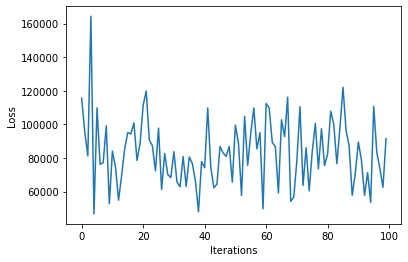

In [991]:
# ## Many texts

epochs = 1000
outputs = []
losses = []

for epoch in range(epochs):
    print(f"Epochs {epoch+1}/{epochs}")
    for i in range(len(enc_desc)):
        val_loss = []

        # Output of Autoencoder
        reconstructed = model_clip(enc_desc[i])
#         print("reconstructed shape: ", reconstructed.shape)
        # Calculating the loss function
#         sim_tensor = nn.CosineSimilarity()(reconstructed, enc_images[i]).float()
#         loss = loss_function(reconstructed, enc_images[i], torch.where(sim_tensor > 0.5, 1, -1))
        loss = loss_function(reconstructed, enc_images[i])
        val_loss.append(loss.cpu().detach().numpy())
#         print("   Loss: ",loss.detach().numpy())
        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(loss.cpu().detach().numpy())
    print("    Loss:", np.array(val_loss).mean())
    outputs.append((epochs, enc_desc[i], reconstructed))
# Defining the Plot Style
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])

In [998]:
out = reconstructed = model_clip(enc_desc[1])

In [999]:
out

tensor([[-1.9097e+02,  9.1466e+01, -1.8366e+02, -6.0849e+01, -8.4525e+00,
         -1.1587e+02, -3.6805e+02, -3.5109e+02,  2.7842e+01,  2.1149e+02,
          2.4740e+02,  1.0726e+02,  3.3415e+02, -1.7342e+02, -8.4921e+01,
          1.6049e+01, -1.3286e+01,  5.2867e+01,  1.9241e+02,  4.0541e+02],
        [ 4.0413e+02, -2.1697e+01, -2.7140e+02,  1.4365e+02,  1.8349e+02,
         -5.4852e+02,  1.8216e+01, -9.3009e+00,  3.7223e+01, -4.0867e+01,
          2.3990e+02,  1.2033e+02, -7.8306e+01,  2.8050e+01,  1.0201e+02,
         -1.1676e+02, -3.9668e+02, -2.1491e+02,  2.7491e+02, -1.8552e+02],
        [-1.1128e+03,  1.0278e+03, -2.6682e+03, -1.9886e+01,  6.9284e+02,
         -2.8273e+03, -3.7223e+03, -3.0564e+03, -6.3554e+01,  1.8961e+03,
          3.2475e+03,  1.5925e+03,  3.0448e+03, -1.4846e+03, -5.7305e+02,
         -3.1749e+02, -9.4212e+02, -1.8088e+02,  2.6053e+03,  2.9929e+03],
        [-2.9668e+03,  1.6222e+03, -3.2494e+03, -5.0813e+02,  4.6668e+02,
         -2.6093e+03, -5.8206e+03, 

In [1000]:
enc_images[1]

tensor([[-1.6947e+02,  1.2178e+02, -1.8251e+02, -4.5540e+01, -1.9665e+01,
         -6.4794e+01, -2.9122e+02, -3.0204e+02,  5.7301e+01,  1.5213e+02,
          1.3272e+02,  8.5002e+01,  2.2032e+02, -1.5731e+02, -9.6709e+01,
          6.6725e+01,  1.1064e+02,  8.4654e+01,  1.5176e+02,  2.7036e+02],
        [ 3.8491e+02, -1.0705e+01, -1.8934e+02, -3.0048e+01,  1.4231e+02,
         -4.2921e+02, -7.1939e+00, -1.8491e+02,  1.2277e+02,  5.2068e+01,
          1.7447e+02,  1.2972e+02,  5.2862e+00, -7.5352e+01,  4.7552e+01,
         -3.9834e+01, -3.1548e+02, -1.2581e+02,  3.5418e+02,  1.5116e+01],
        [-9.8321e+02,  9.8033e+02, -2.7189e+03,  2.0251e+02,  6.9821e+02,
         -2.9117e+03, -3.4504e+03, -2.7696e+03, -1.2685e+02,  1.6936e+03,
          3.1928e+03,  1.5028e+03,  2.7394e+03, -1.2088e+03, -4.6386e+02,
         -3.6851e+02, -1.0642e+03, -2.8702e+02,  2.4429e+03,  2.6048e+03],
        [-2.2202e+03,  1.5028e+03, -3.3851e+03, -8.5340e+01,  3.4342e+02,
         -2.7904e+03, -4.8151e+03, 

In [1001]:
nn.CosineSimilarity()(out, enc_images[1]).mean()

tensor(0.9663, device='cuda:0', grad_fn=<MeanBackward0>)

In [1002]:
image = model_img.decoder(out)

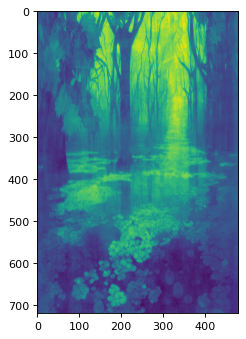

In [1003]:
figure(figsize=(5,5), dpi=80)
plt.imshow(image.cpu().detach().numpy())
plt.show()

## Heatmap for the similarity

In [1009]:
matrix = np.zeros((len(enc_images),len(enc_desc)))
for i in range(len(enc_images)):
    for j in range(len(enc_desc)):
        out = model_clip(enc_desc[j])
        similarity = nn.CosineSimilarity()(out, enc_images[i]).mean().cpu().detach().numpy()
        matrix[i][j] = similarity

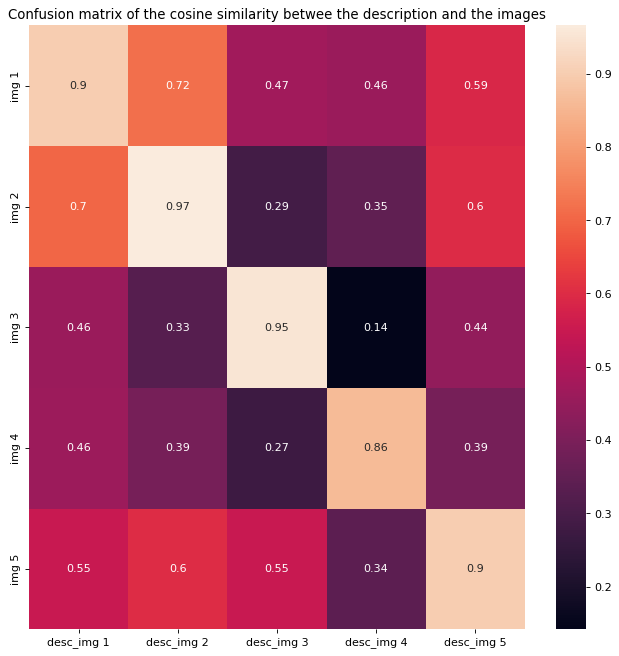

In [1012]:
figure(figsize=(10,10), dpi=80)
sns.heatmap(matrix, annot=True,yticklabels=["img 1", "img 2", "img 3", "img 4", "img 5"], xticklabels=["desc_img 1", "desc_img 2", "desc_img 3", "desc_img 4", "desc_img 5"])
plt.title("Confusion matrix of the cosine similarity betwee the description and the images")
plt.show()